# Kr DD profiles

J. A Hernando, C. Herves

March 2022

In [26]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [27]:
import numpy             as np
import pandas            as pd
import tables            as tb
from   scipy             import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [28]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.profile      as prof

import nana.kr.krana     as krana

#import nana.bclouds.bclouds      as bc
#import hipy.hfit         as hfit

#import invisible_cities.io.dst_io as dio

In [29]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri May 13 17:50:48 2022


In [30]:
#import os
import re
import glob

from collections import namedtuple

## Code

## LT and shape 

In [31]:
df = krana.generate_kr_toy(100000, tau = 0.1, beta = 0.2, x0 = 0.05, y0 = -0.05)
df

,dtime,x,y,energy
0,0.439442,-0.303292,-0.402828,29.433210
1,0.011814,-0.408353,-0.042060,31.273857
2,0.366015,-0.373722,0.158028,33.328098
3,0.453157,-0.143337,0.137279,35.662818
4,0.422011,0.183978,0.278771,34.299454
...,...,...,...,...
75566,0.394748,-0.143242,0.065606,38.558526
75567,0.462919,0.296301,0.317370,33.253788
75568,0.736197,0.121834,0.392158,32.916556
75569,0.108419,-0.232863,-0.317918,38.016072


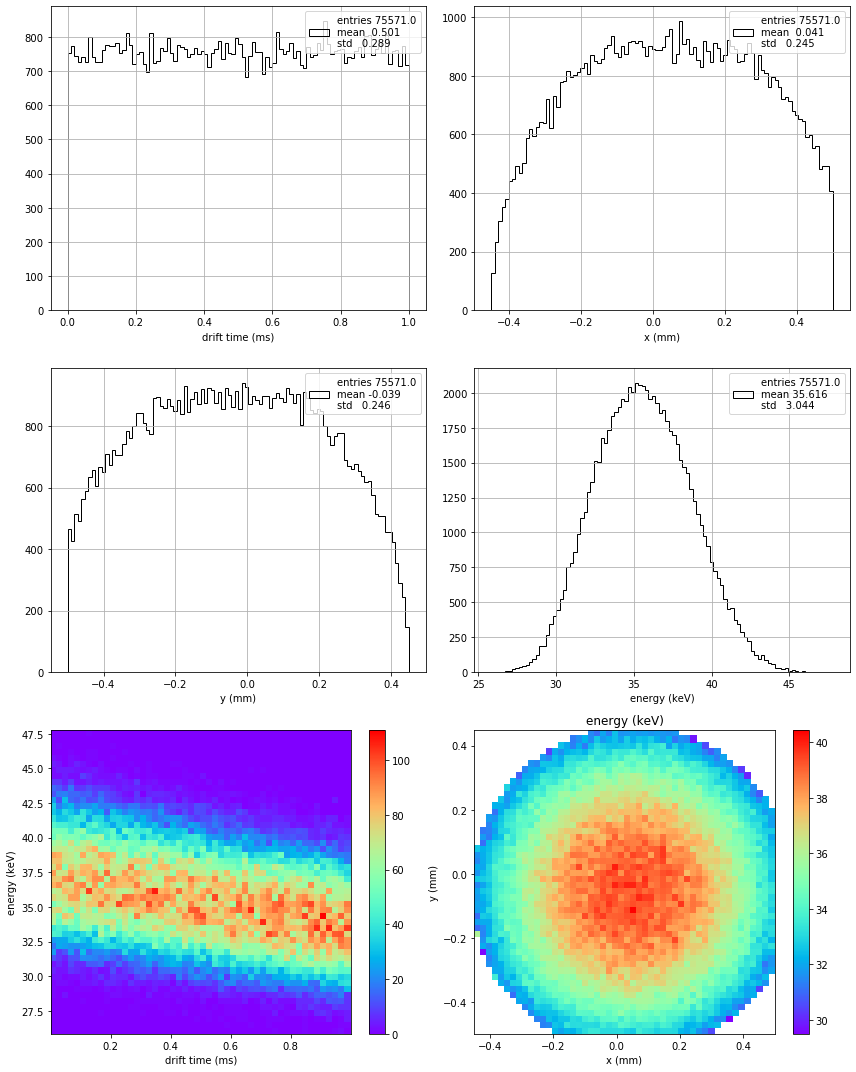

In [32]:
krana.plot_data(df, 50)

In [33]:
coors  = df.x, df.y
energy = df.energy
dtime  = df.dtime
counts_min = 10
grain  = 2
krmap, residuals = krana.krmap(coors, dtime, energy, 
                               bins = (18 * grain, 18 * grain), counts_min = counts_min,
                               dt0 = None)

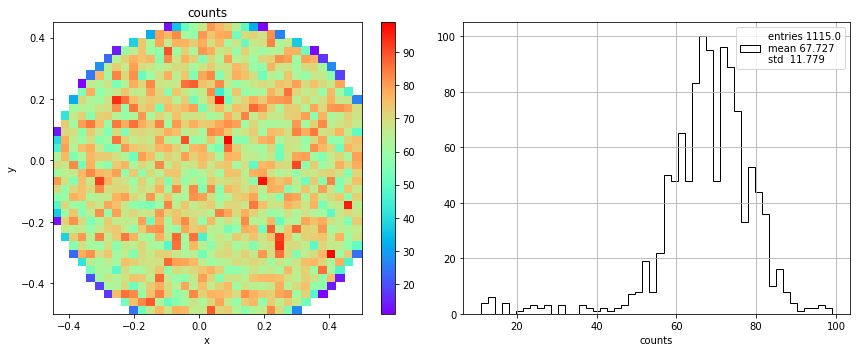

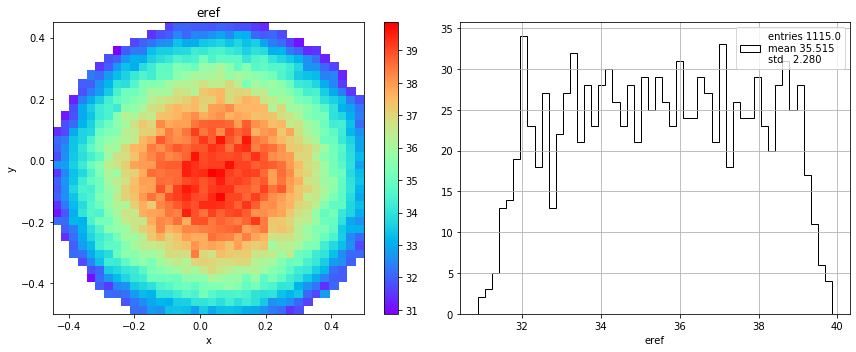

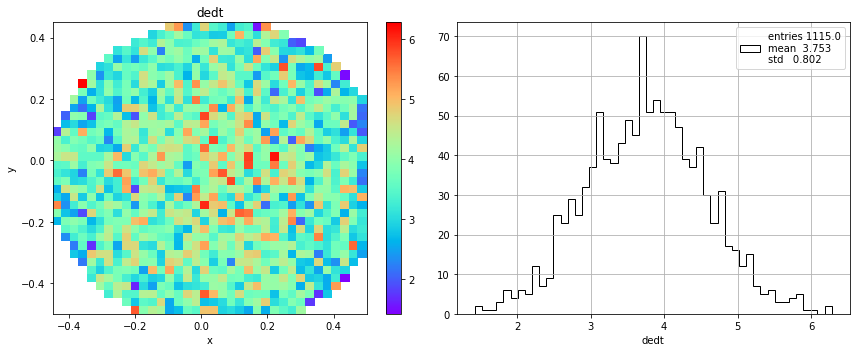

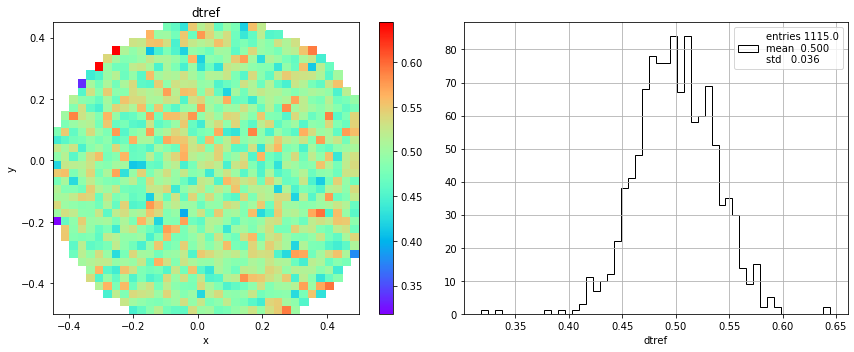

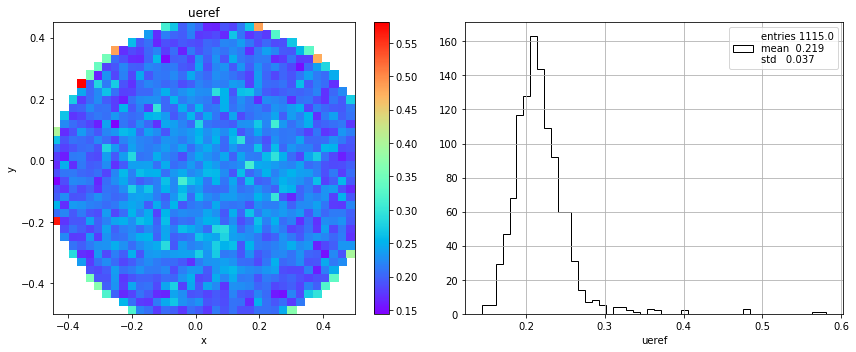

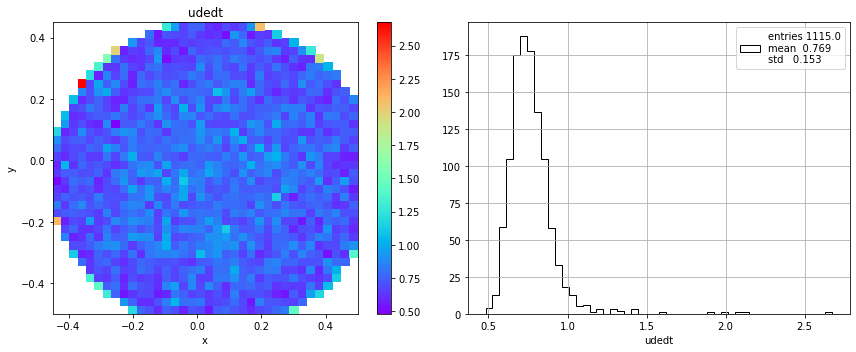

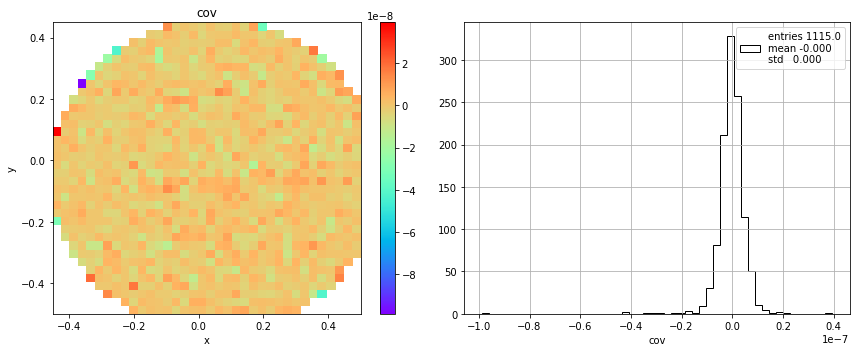

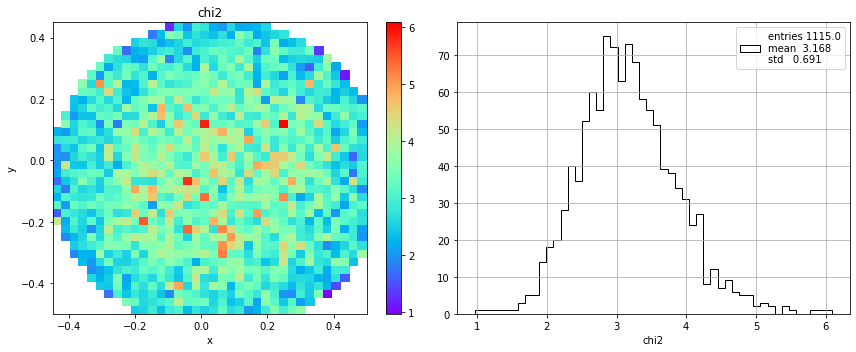

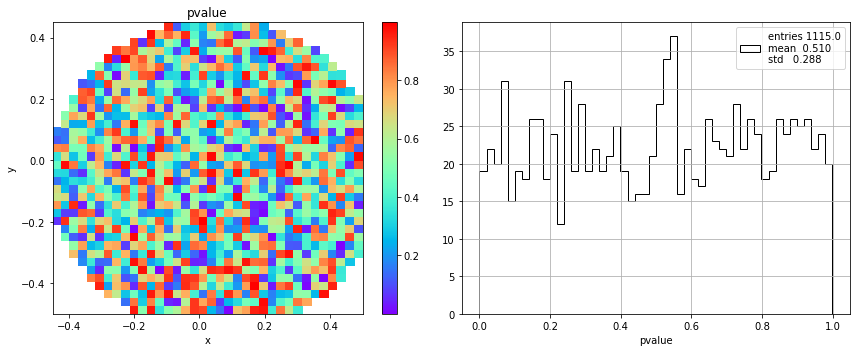

In [34]:
prof.plot_profile(krmap, stats = ('counts', 'eref', 'dedt', 'dtref', 'ueref', 'udedt', 'cov', 'chi2', 'pvalue'));

### correction

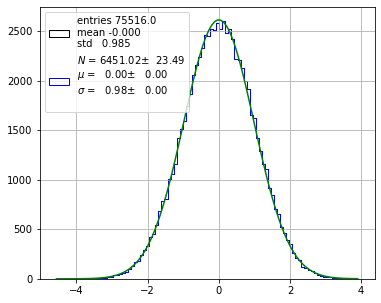

In [35]:
pltext.canvas(1, 1);
xsel = ~np.isnan(residuals)
pltext.hist(residuals[xsel], 100);
pltext.hfit(residuals[xsel], 100, fun = 'gaus');

In [36]:
corenergy  = krana.krmap_scale(coors, dtime, energy, krmap, scale = 41.5)

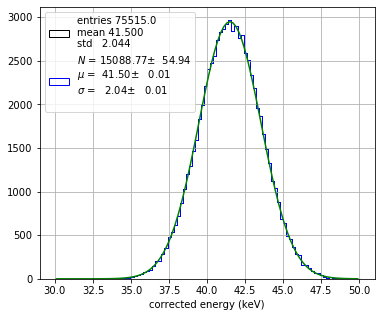

In [37]:
pltext.canvas(1, 1)
pltext.hist(corenergy, 100, (30., 50.));
pltext.hfit(corenergy, 100, fun = 'gaus', range = (30., 50.));
plt.xlabel('corrected energy (keV)');

### Validate correction

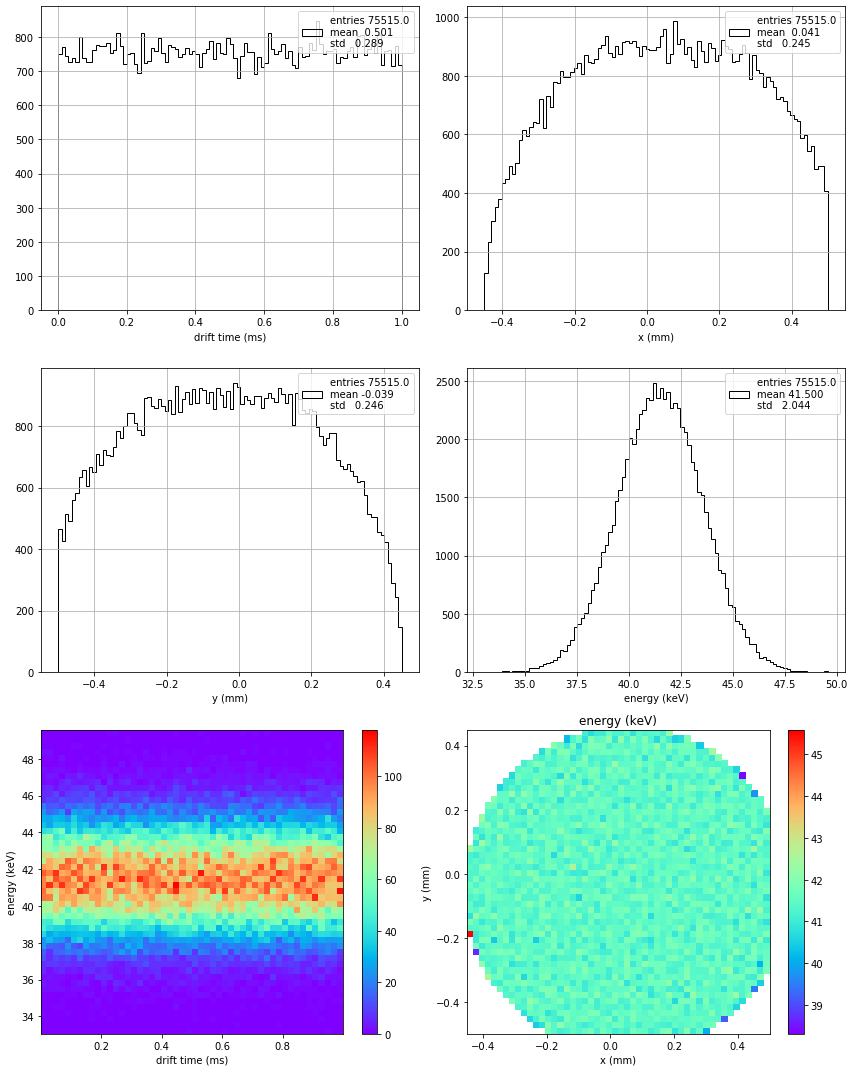

In [38]:
xdf = pd.DataFrame(df) 
xdf['energy'] = corenergy
xsel = ut.in_range(corenergy, (30, 50))
krana.plot_data(xdf[xsel], 50)

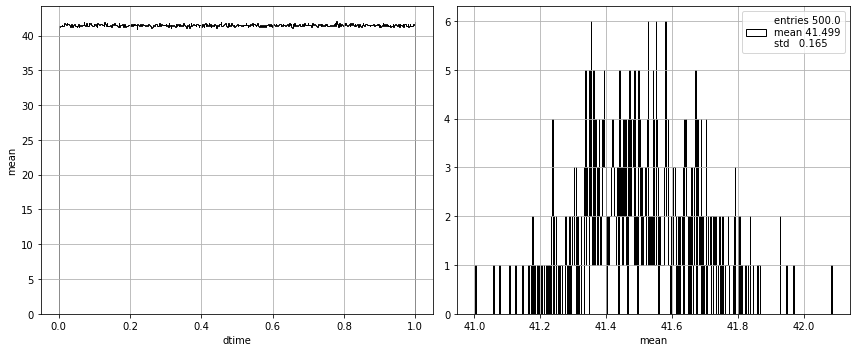

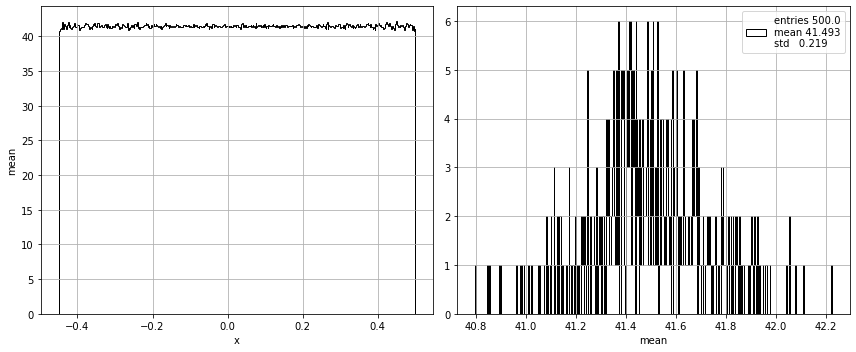

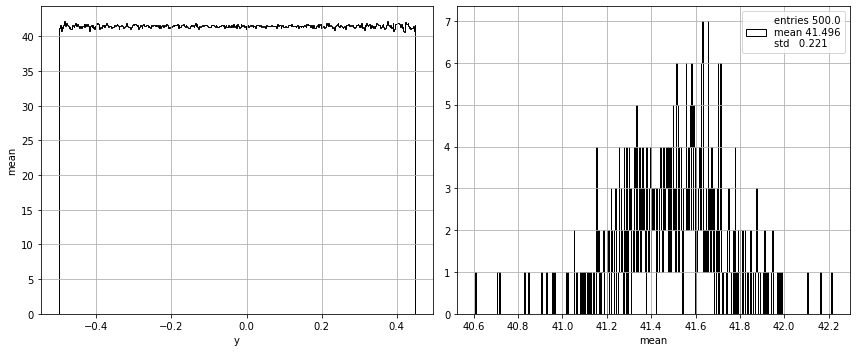

In [39]:
krana.plot_xydt_energy_profiles(xdf[xsel], nbins = 500)

## Test save/load the krmap

In [40]:
krana.save(krmap, 'krmap', 'test.h5')

In [41]:
kk = krana.load('krmap', 'test.h5')

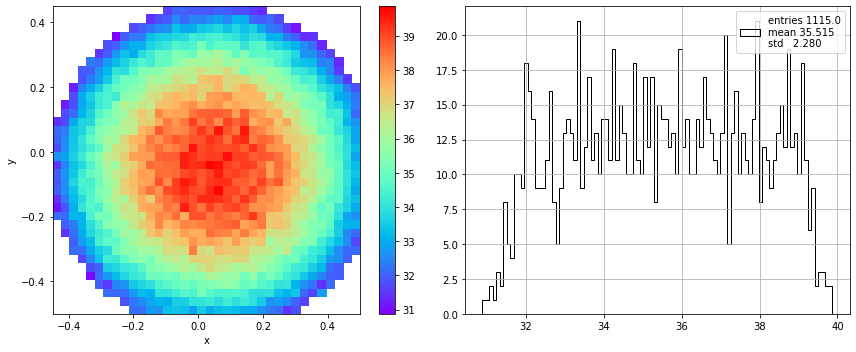

In [42]:
krana.plot_xyvar(krmap.eref, krmap.bin_edges, mask = krmap.success)